# Fake News Detection


In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer


# 1.Dataset Description

In [2]:
import csv
df=pd.read_csv('/kaggle/input/news-dataset/news.csv')


In [3]:
df.shape

(6335, 4)

In [11]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [5]:
df.dtypes

Unnamed: 0     int64
title         object
text          object
label         object
dtype: object

In [12]:
df.describe(include = object)

,title,text,label
count,6335,6335,6335
unique,6256,6060,2
top,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,5,58,3171


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [14]:
df['text'].isnull().sum()

0

In [17]:
df.fillna('', inplace=True)

In [19]:
df['label'].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

In [20]:
labels=df.label
labels.head(10)

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
5    FAKE
6    FAKE
7    REAL
8    REAL
9    REAL
Name: label, dtype: object

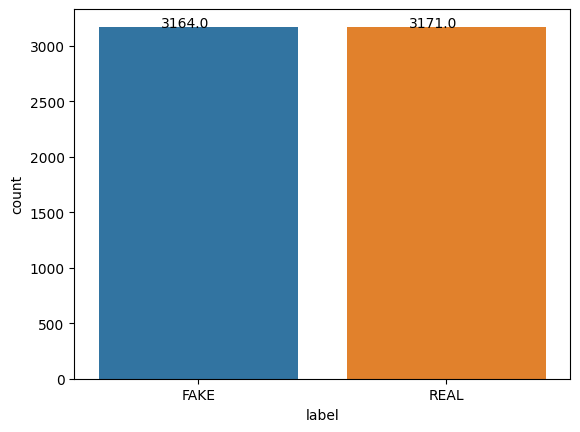

In [21]:
ax=sns.countplot(x ='label', data = df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

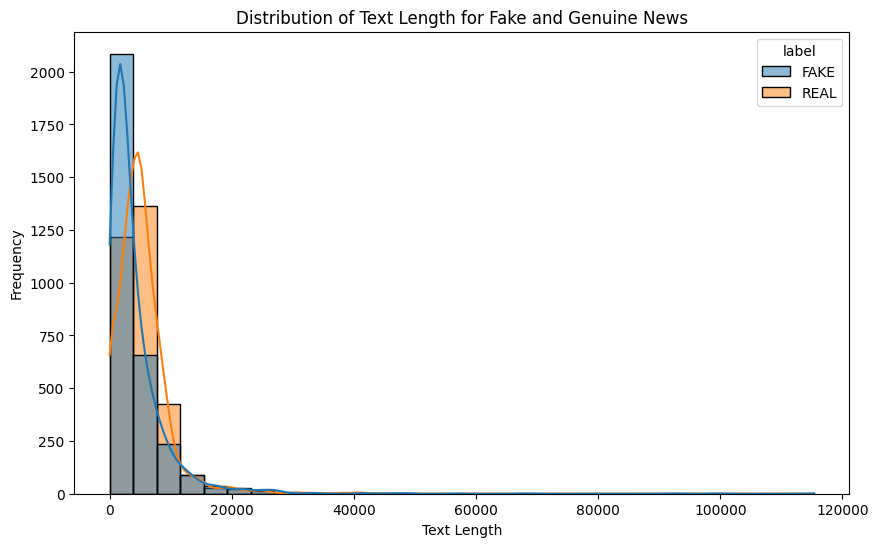

In [22]:
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(x='text_length', data=df, hue='label', bins=30, kde=True)
plt.title('Distribution of Text Length for Fake and Genuine News')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


# 2. Data Pre-processing

In [23]:
from tqdm import tqdm
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,ImageColorGenerator
import string

In [24]:
text = df['text'].str.lower()
text.head()

0    daniel greenfield, a shillman journalism fello...
1    google pinterest digg linkedin reddit stumbleu...
2    u.s. secretary of state john f. kerry said mon...
3    — kaydee king (@kaydeeking) november 9, 2016 t...
4    it's primary day in new york and front-runners...
Name: text, dtype: object

In [25]:
all_spam = df['text'].str.split(' ')
all_spam.head()

0    [Daniel, Greenfield,, a, Shillman, Journalism,...
1    [Google, Pinterest, Digg, Linkedin, Reddit, St...
2    [U.S., Secretary, of, State, John, F., Kerry, ...
3    [—, Kaydee, King, (@KaydeeKing), November, 9,,...
4    [It's, primary, day, in, New, York, and, front...
Name: text, dtype: object

In [27]:
all_spam_cleaned = []

for text in all_spam:
    text = [x.strip(string.punctuation) for x in text]
    all_spam_cleaned.append(text)

all_spam_cleaned[0]

text_spam = [" ".join(text) for text in all_spam_cleaned]
final_text_spam = " ".join(text_spam)

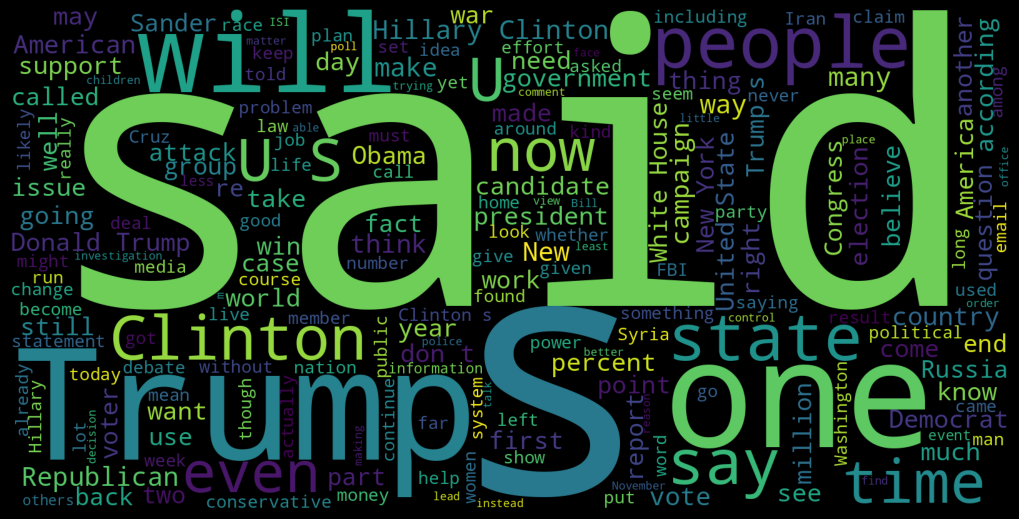

In [32]:
text = final_text_spam
wordcloud = WordCloud(width=1600, height=800).generate(text)
plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [34]:
text = df['title'].str.lower()
text.head()

0                         you can smell hillary’s fear
1    watch the exact moment paul ryan committed pol...
2          kerry to go to paris in gesture of sympathy
3    bernie supporters on twitter erupt in anger ag...
4     the battle of new york: why this primary matters
Name: title, dtype: object

In [35]:
all_spam = df['title'].str.split(' ')
all_spam.head()

0                   [You, Can, Smell, Hillary’s, Fear]
1    [Watch, The, Exact, Moment, Paul, Ryan, Commit...
2    [Kerry, to, go, to, Paris, in, gesture, of, sy...
3    [Bernie, supporters, on, Twitter, erupt, in, a...
4    [The, Battle, of, New, York:, Why, This, Prima...
Name: title, dtype: object

In [36]:
all_spam_cleaned = []

for text in all_spam:
    text = [x.strip(string.punctuation) for x in text]
    all_spam_cleaned.append(text)

all_spam_cleaned[0]

text_spam = [" ".join(text) for text in all_spam_cleaned]
final_text_spam = " ".join(text_spam)

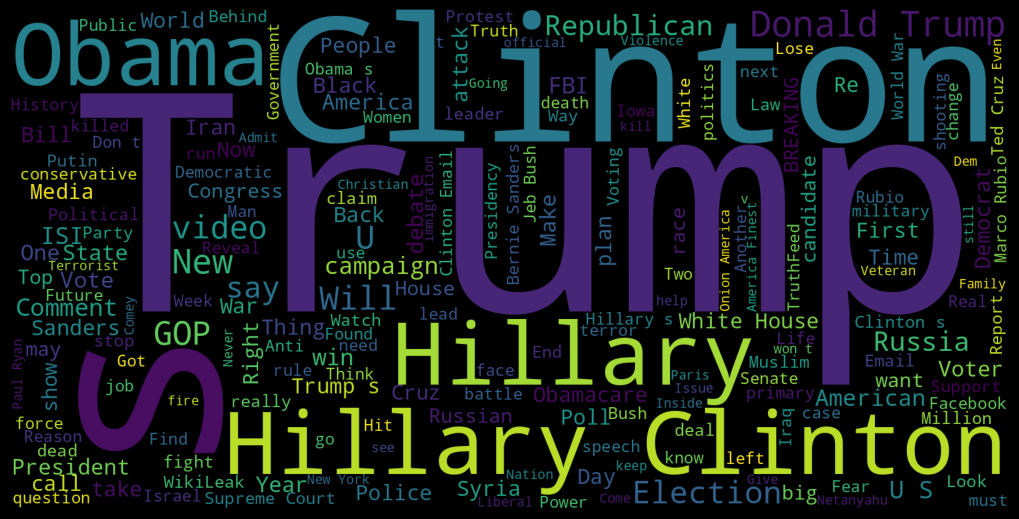

In [37]:
text = final_text_spam
wordcloud = WordCloud(width=1600, height=800).generate(text)
plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [38]:
x_text=df['title'].tolist()
x=x_text[10:15]

In [39]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english')
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')

tfidf_train=tfidf_vectorizer.fit_transform(x) 

count_wm = countvectorizer.fit_transform(x)
tfidf_wm = tfidf_vectorizer.fit_transform(x)
count_tokens = countvectorizer.get_feature_names_out()
tfidf_tokens = tfidf_vectorizer.get_feature_names_out()
df_countvect = pd.DataFrame(data = count_wm.toarray(),columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)
print("Count Vectorizer\n")
print(df_countvect)
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)

Count Vectorizer

   10  2016  26  america  campaign  clinton  clintons  cruz  delegate  donald  \
0   0     0   0        0         1        1         1     0         0       0   
1   0     0   0        0         0        0         0     0         1       1   
2   0     1   1        0         0        0         0     0         0       0   
3   1     0   0        1         0        0         0     0         0       0   
4   0     0   0        0         0        0         0     1         0       0   

   ...  takes  tech  today  trump  video  war  ways  weak  world  worse  
0  ...      0     0      0      0      0    0     0     0      0      0  
1  ...      0     0      0      1      0    0     0     1      0      1  
2  ...      0     1      1      0      1    0     0     0      0      0  
3  ...      0     0      0      0      0    1     1     0      1      0  
4  ...      1     0      0      1      0    0     0     0      0      0  

[5 rows x 36 columns]

TD-IDF Vectorizer

        

In [40]:
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.3, random_state=7)

In [42]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)
print('TF-IDF VECTORIZER FOR TRAINED DATA\n')
print(tfidf_train)
print('\nTF-IDF VECTORIZER FOR TESTED DATA\n')
print(tfidf_test)

TF-IDF VECTORIZER FOR TRAINED DATA

  (0, 46243)	0.018028442145904655
  (0, 18026)	0.025972285147429802
  (0, 27350)	0.017037979781455933
  (0, 43708)	0.019062491785362987
  (0, 31998)	0.022688490625100696
  (0, 31441)	0.019215636585183153
  (0, 56537)	0.013826675546381298
  (0, 26163)	0.044023103170713916
  (0, 18016)	0.03211969788147898
  (0, 13791)	0.02050118822024672
  (0, 45988)	0.023336220306775145
  (0, 29927)	0.021144268699550665
  (0, 2408)	0.036062612290315946
  (0, 33718)	0.017611644788296226
  (0, 16039)	0.013082738458051411
  (0, 15220)	0.021911459939908454
  (0, 27522)	0.044023103170713916
  (0, 12525)	0.02515272626229272
  (0, 48716)	0.033566401165006476
  (0, 39284)	0.019521951857910003
  (0, 27885)	0.022406400075440088
  (0, 10402)	0.018736098030419722
  (0, 51977)	0.023916520582493783
  (0, 40291)	0.029656252738219507
  (0, 30420)	0.018849986269092636
  :	:
  (4433, 30853)	0.09488178901894634
  (4433, 2002)	0.04537688490367202
  (4433, 32181)	0.08272901953207691
  (44

# 3.ML learning algorithms

In [43]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix,f1_score,precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

***Passive Aggressive Classifier***

In [45]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac=pac.fit(tfidf_train,y_train)
y_pred=pac.predict(tfidf_test)
xscore=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(xscore*100,2)}%')

Accuracy: 92.27%


In [46]:
print(classification_report(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label='REAL'))
print('F1 score:',metrics.f1_score(y_test, y_pred,pos_label='REAL'))
print('Recall:',metrics.recall_score(y_test, y_pred,pos_label='REAL'))

              precision    recall  f1-score   support

        FAKE       0.93      0.92      0.92       974
        REAL       0.92      0.92      0.92       927

    accuracy                           0.92      1901
   macro avg       0.92      0.92      0.92      1901
weighted avg       0.92      0.92      0.92      1901

Precision: 0.9193548387096774
F1 score: 0.9208400646203553
Recall: 0.9223300970873787


[[899  75]
 [ 72 855]]


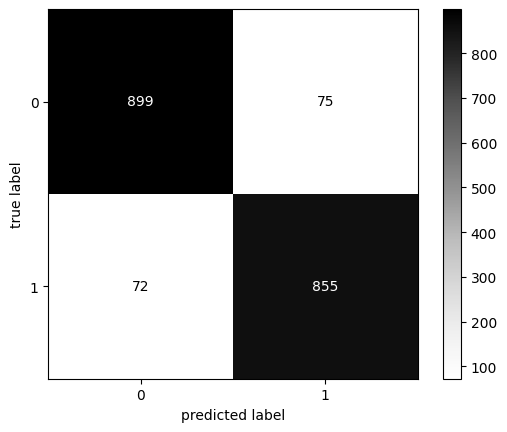

In [47]:
cf=confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print(cf)
binary1 =cf
ax = plot_confusion_matrix(conf_mat=binary1,colorbar=True,cmap='Greys',fontcolor_threshold=0.4)
plt.show()

***Decision Tree Classifier***

In [50]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(tfidf_train,y_train)
y_pred = dtc.predict(tfidf_test)
yscore=accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(yscore*100,2)}%')

Accuracy: 80.9%


[[782 192]
 [171 756]]


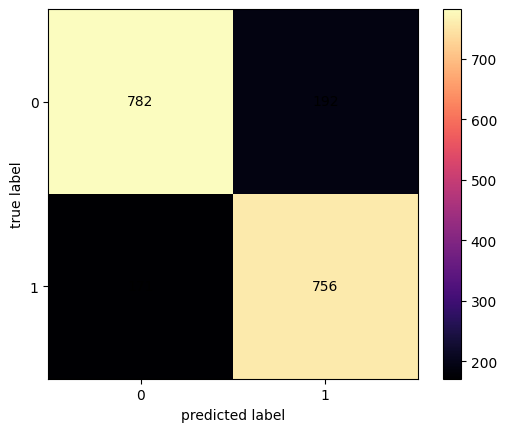

In [63]:
cf=confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print(cf)
binary1 =cf
ax = plot_confusion_matrix(conf_mat=binary1,colorbar=True,cmap='magma',fontcolor_threshold=3)
plt.show()

In [64]:

print(classification_report(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label='REAL'))
print('F1 score:',metrics.f1_score(y_test, y_pred,pos_label='REAL'))
print('Recall:',metrics.recall_score(y_test, y_pred,pos_label='REAL'))


              precision    recall  f1-score   support

        FAKE       0.82      0.80      0.81       974
        REAL       0.80      0.82      0.81       927

    accuracy                           0.81      1901
   macro avg       0.81      0.81      0.81      1901
weighted avg       0.81      0.81      0.81      1901

Precision: 0.7974683544303798
F1 score: 0.8064
Recall: 0.8155339805825242


***Random Forest Classifier***

In [65]:
rfc = RandomForestClassifier()
rfc = rfc.fit(tfidf_train,y_train)
y_pred = rfc.predict(tfidf_test)
zscore=accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(zscore*100,2)}%')

Accuracy: 90.48%


[[884  90]
 [ 91 836]]


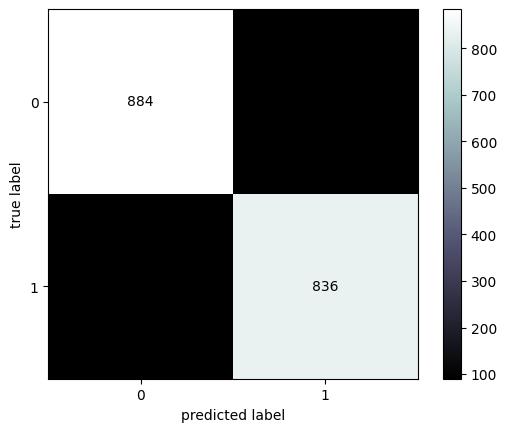

In [73]:
cf=confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print(cf)
binary1 =cf
ax = plot_confusion_matrix(conf_mat=binary1,colorbar=True,cmap='bone',fontcolor_threshold=3)
plt.show()

In [71]:
print(classification_report(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label='REAL'))
print('F1 score:',metrics.f1_score(y_test, y_pred,pos_label='REAL'))
print('Recall:',metrics.recall_score(y_test, y_pred,pos_label='REAL'))

              precision    recall  f1-score   support

        FAKE       0.91      0.91      0.91       974
        REAL       0.90      0.90      0.90       927

    accuracy                           0.90      1901
   macro avg       0.90      0.90      0.90      1901
weighted avg       0.90      0.90      0.90      1901

Precision: 0.9028077753779697
F1 score: 0.9023205612520238
Recall: 0.9018338727076591


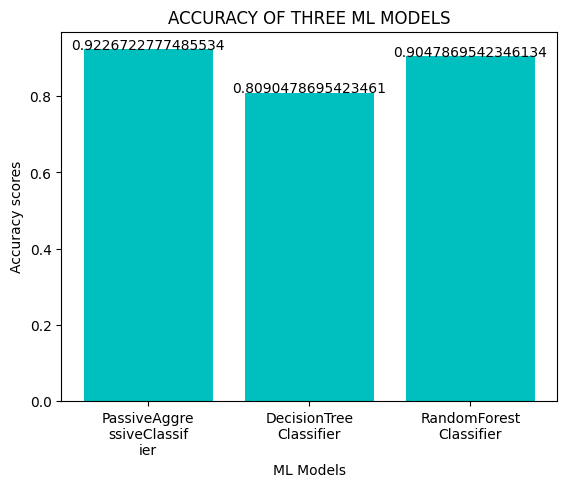

In [75]:
from textwrap import wrap
x=['PassiveAggressiveClassifier','DecisionTreeClassifier','RandomForestClassifier']
y=[xscore,yscore,zscore]
x = [ '\n'.join(wrap(l, 12)) for l in x ]
plt.bar(x,y,color='c')
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha = 'center')
plt.title("ACCURACY OF THREE ML MODELS")
plt.ylabel("Accuracy scores")
plt.xlabel("ML Models")
plt.show()
